In [55]:
!pip install netCDF4 
!pip install matplotlib 
!pip install numpy 
!pip install folium
!pip install mplleaflet

  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-py3-none-any.whl size=28555 sha256=04679e014d39f78017d08e1d19a154a9169c3d6cdd162882c7db6da22bbbac9d
  Stored in directory: /home/syseng/omejiaa/.cache/pip/wheels/54/11/d6/5d25309bb8b662bd29880f7ffec893b66ffa677086a436c041
Successfully built mplleaflet


In [97]:
import folium 
from wrf import getvar, interplevel, to_np, latlon_coords
from folium import plugins
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [50]:
nc= NetCDFFile('/work/syseng/wrfda_2021-06-03-22.50.04/m1')

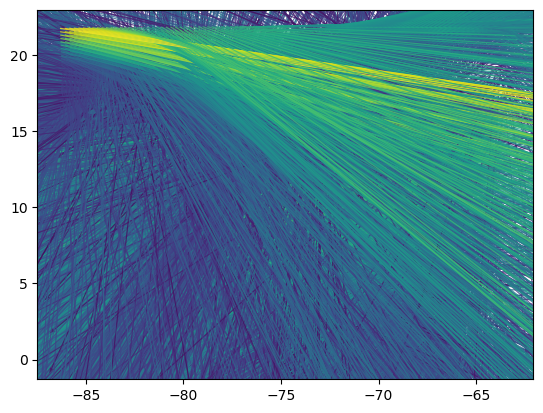

In [168]:
def get_wind_data(data: NetCDFFile, t: int, z: int):
    z *= 1000
    height = getvar(data, "height", timeidx=t)
    u_all = getvar(data, 'ua', units="m s-1", timeidx=t)
    v_all = getvar(data, 'va', units="m s-1", timeidx=t)
    w_all = getvar(data, 'wa', units="m s-1", timeidx=t)
    u = interplevel(u_all, height, z)
    v = interplevel(v_all, height, z)
    w = interplevel(w_all, height, z)
    
    return u, v, np.sqrt(u**2+v**2+w**2) 

U, V, mag = get_wind_data(nc, t=1, z=6)
lats, lons = latlon_coords(u)

fig, ax = plt.subplots()

kw = dict(color='black', alpha=0.8, scale=1)
q = ax.quiver(lats, lons, U, V,mag, **kw)



####################################################################
# SI SE VE RARAS LAS LINEAS AL EJECUTAR FOLIUM CAMBIAR LAST Y LONS #
####################################################################

In [166]:
# # convert to (n, 2) nd-array format for heatmap
# stationArr = df_mag[['XLAT', 'XLONG']]
# stationArr
# mapa = folium.Map(location=[lats.mean(), lons.mean()], tiles="Cartodb Positron",zoom_start=11)     
# mapa


feature_group0 = folium.FeatureGroup(name='quiver')

mapa = folium.Map(location=[lats.mean(), lons.mean()], tiles="Cartodb Positron",
                  zoom_start=10)

for feature in gj['features']:
    if feature['geometry']['type'] == 'Point':
        lon, lat = feature['geometry']['coordinates']
        div = feature['properties']['html']

        icon_anchor = (feature['properties']['anchor_x'],
                       feature['properties']['anchor_y'])

        icon = folium.features.DivIcon(html=div,
                                       icon_anchor=icon_anchor)
        marker = folium.Marker([lat, lon], icon=icon)
        feature_group0.add_children(marker)
    else:
        msg = "Unexpected geometry {}".format
        raise ValueError(msg(feature['geometry']))
    
mapa.add_child(feature_group0)
mapa

NameError: name 'gj' is not defined